In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import linregress

In [2]:
df = pd.read_csv('./epa-sea-level.csv', index_col='Year')

In [3]:
df

,CSIRO Adjusted Sea Level,Lower Error Bound,Upper Error Bound,NOAA Adjusted Sea Level
Year,,,,
1880,0.000000,-0.952756,0.952756,NaN
1881,0.220472,-0.732283,1.173228,NaN
1882,-0.440945,-1.346457,0.464567,NaN
1883,-0.232283,-1.129921,0.665354,NaN
1884,0.590551,-0.283465,1.464567,NaN
...,...,...,...,...
2009,8.586614,8.311024,8.862205,8.046354
2010,8.901575,8.618110,9.185039,8.122973
2011,8.964567,8.661417,9.267717,8.053065


<AxesSubplot:xlabel='Year'>

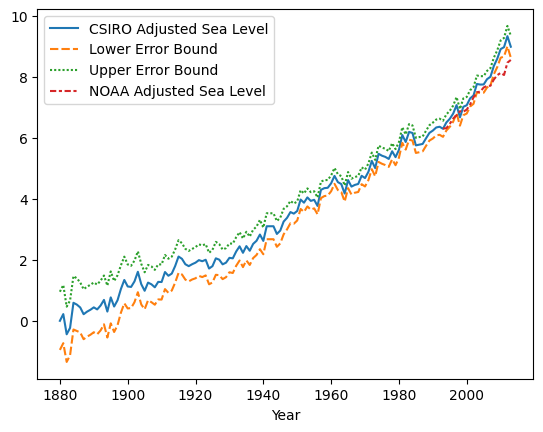

In [4]:
sns.lineplot(df)

<AxesSubplot:xlabel='Year', ylabel='CSIRO Adjusted Sea Level'>

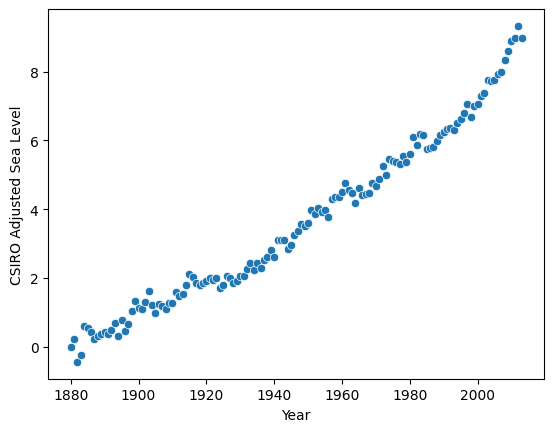

In [5]:
sns.scatterplot(data=df, x='Year', y='CSIRO Adjusted Sea Level')

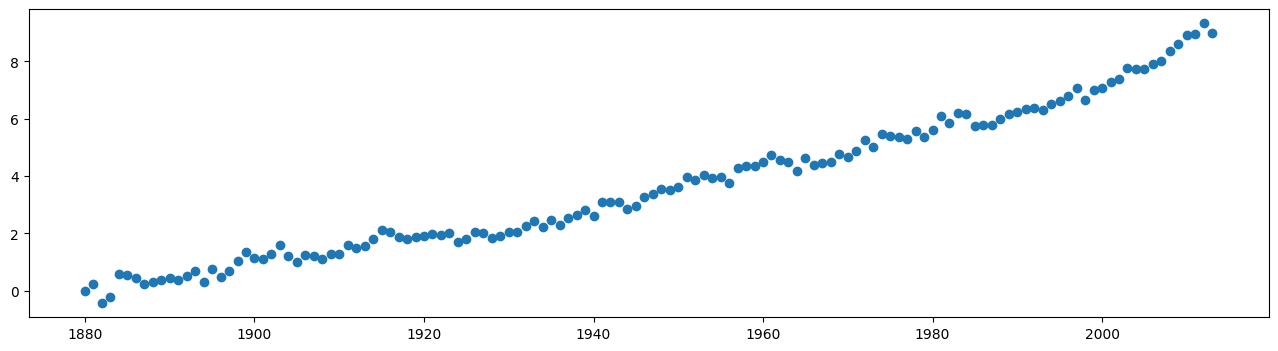

In [6]:
plt.figure(figsize=(16,4))
plt.scatter(x=df.index, y=df['CSIRO Adjusted Sea Level'])

In [7]:
reg = linregress(x=df.index, y=df['CSIRO Adjusted Sea Level'])

In [8]:
future = [i for i in range(2014, 2051)]
future = pd.DataFrame(index=future)

In [9]:
df = df.append(future)

/tmp/ipykernel_17031/1501890837.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(future)


In [10]:
t = [reg.slope * i + reg.intercept for i in df.index]
df['linregress']=t

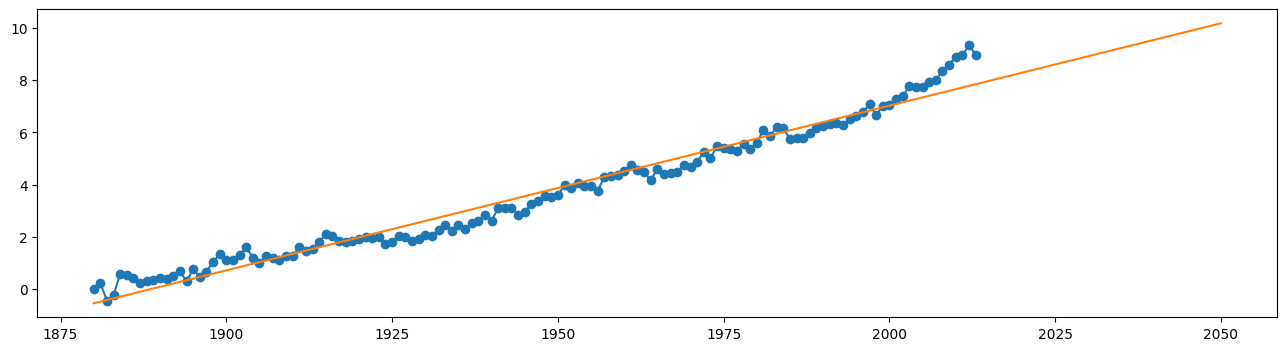

In [15]:
plt.figure(figsize=(16,4))
plt.scatter(x=df.index, y=df['CSIRO Adjusted Sea Level'])
plt.plot(df[['CSIRO Adjusted Sea Level', 'linregress']])

,CSIRO Adjusted Sea Level,Lower Error Bound,Upper Error Bound,NOAA Adjusted Sea Level,linregress
2000,7.062992,6.791339,7.334646,6.920582,7.023226
2001,7.287402,7.019685,7.555118,7.087460,7.086271
2002,7.381890,7.110236,7.653543,7.319698,7.149315
2003,7.759843,7.484252,8.035433,7.488353,7.212360
2004,7.740157,7.464567,8.015748,7.507933,7.275404
2005,7.744094,7.472441,8.015748,7.644563,7.338449
2006,7.917323,7.645669,8.188976,7.697420,7.401494
2007,7.996063,7.712598,8.279528,7.702147,7.464538
2008,8.350394,8.078740,8.622047,7.907365,7.527583
2009,8.586614,8.311024,8.862205,8.046354,7.590627


In [30]:
reg2df = df.loc[2000:2013].copy()
reg2 = linregress(x=reg2df.index, y=reg2df['CSIRO Adjusted Sea Level'])
reg2df = reg2df.append(future)

/tmp/ipykernel_17031/2861238410.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  reg2df = reg2df.append(future)


In [31]:
reg2df['linregress'] = [reg2.slope * i + reg2.intercept for i in reg2df.index]

Text(0.5, 1.0, 'Rise in Sea Level')

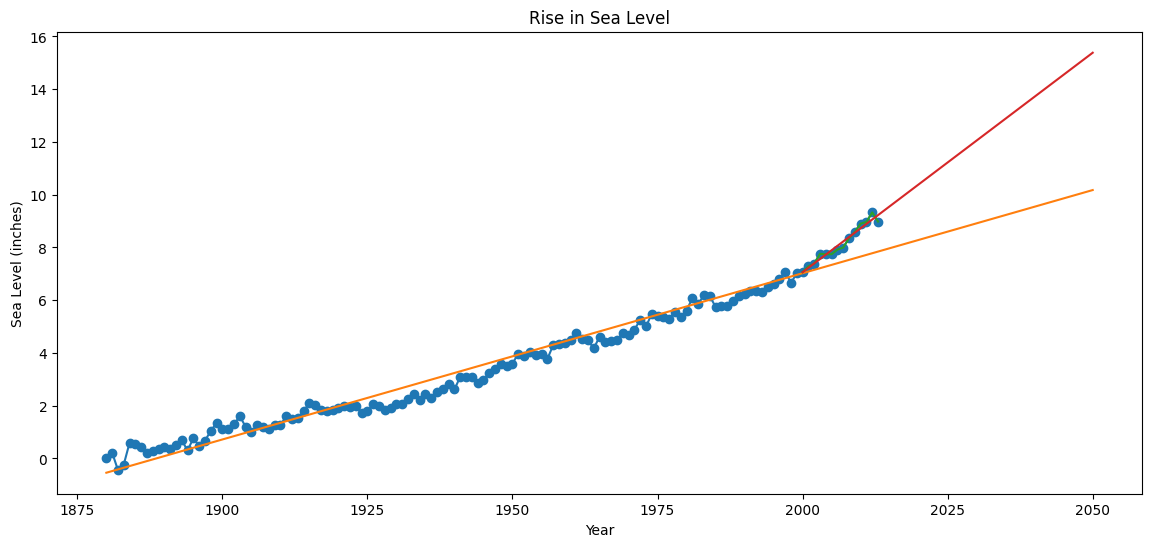

In [38]:
plt.figure(figsize=(14,6))
plt.scatter(x=df.index, y=df['CSIRO Adjusted Sea Level'])
plt.plot(df[['CSIRO Adjusted Sea Level', 'linregress']])
plt.plot(reg2df[['CSIRO Adjusted Sea Level', 'linregress']])
plt.xlabel('Year')
plt.ylabel('Sea Level (inches)')
plt.title('Rise in Sea Level')